In [8]:
import torch
import cv2
from tqdm import tqdm_notebook as tqdm
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import os
import warnings
warnings.filterwarnings("ignore")

In [7]:
files = os.listdir('../output_files/')
cf = np.load('../output_files/'+files[2])
plt.heatmap(cf)

AttributeError: module 'matplotlib.pyplot' has no attribute 'heatmap'

In [3]:
a = '../data/HAM10k/HAM10000_metadata.csv'
aug = read_file(a)
class_aug = aug['dx'].value_counts()
class_aug

nv       6705
mel      1113
bkl      1099
bcc       514
akiec     327
vasc      142
df        115
Name: dx, dtype: int64

In [4]:
file = '../csv/AUg2.0_Meta_All.csv'
m = read_file(file)
class_dist = m['dx'].value_counts()
class_dist

df       6727
vasc     6722
bcc      6715
mel      6711
bkl      6709
akiec    6707
nv       6705
Name: dx, dtype: int64

In [6]:
d2 = dict(class_aug)
y2 = list(d2.values())

d = dict(class_dist)
x = list(d.keys())
y= list(d.values())

new_values = []
for idx, val in enumerate(y):
    nl = y2[idx] - y[idx]
    new_values.append(np.abs(nl))


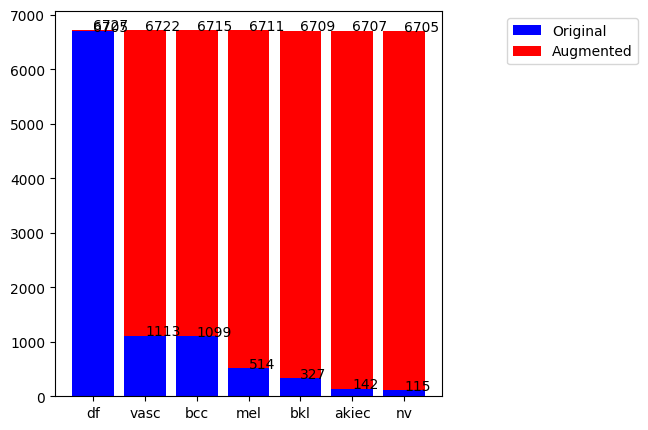

In [9]:
plt.figure(figsize=(5, 5))   
plt.bar(x, y, color='b')
plt.bar(x, new_values, bottom=y2, color='r')
for i in range(len(x)):
    plt.text(i,y[i],y[i])
    plt.text(i, y2[i], y2[i])

plt.legend(['Original', 'Augmented'], loc='upper left', bbox_to_anchor=(1.15,1))
plt.savefig('../output_files/dist_stacked.png')

In [77]:
import seaborn.objects as so
p = so.Plot(diamonds, "price").scale(x="log")
p.add(so.Bars(), so.Hist())

NameError: name 'diamonds' is not defined

  Team  Round 1  Round 2  Round 3  Round 4
0    A       10       20       10       26
1    B       20       25       15       21
2    C       12       15       19        6
3    D       10       18       11       19


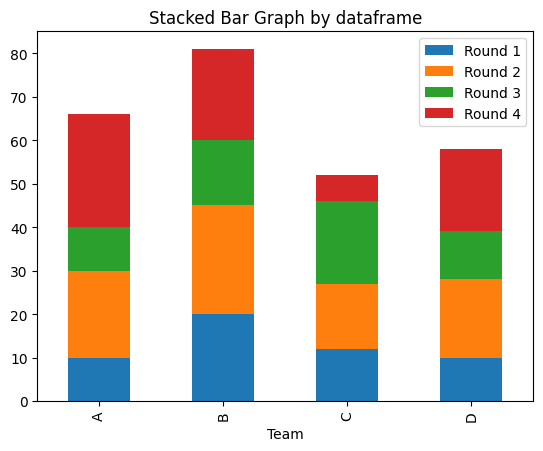

In [10]:
 
# create data
df = pd.DataFrame([['A', 10, 20, 10, 26], ['B', 20, 25, 15, 21], ['C', 12, 15, 19, 6],
                   ['D', 10, 18, 11, 19]],
                  columns=['Team', 'Round 1', 'Round 2', 'Round 3', 'Round 4'])
# view data
print(df)
 
# plot data in stack manner of bar type
df.plot(x='Team', kind='bar', stacked=True,
        title='Stacked Bar Graph by dataframe')
plt.show()

### Dataset Split

In [2]:
def read_file(path):
    meta = pd.read_csv(path, index_col=False)
    return meta

# meta = read_file(file_path)

In [ ]:
meta  = read_file('../data/Aug2.0_Meta_all.csv')

In [ ]:
root = '../data/Aug2.0/'
file_path = '../data/new_augmented.csv'

In [ ]:
meta['new_paths'] = root + meta['image_id']+'.jpg'
meta

In [ ]:
X, y = meta.iloc[:,[0,1,3,4,5,6,7]], meta.iloc[:,2]

# train/test Split
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.20, stratify=y)
print(f"train: {len(xtrain)}, test: {len(xtest)} ")

# Concat X/y for train/test
xtrain.insert(loc = 2, column = 'dx', value = ytrain)
xtest.insert(loc= 2 , column = 'dx', value = ytest )

# Writing to CSV
xtest.to_csv('../data/Aug2.0_test.csv', index=False)
xtrain.to_csv('../data/Aug2.0_train.csv', index=False)

xtrain['dx'].value_counts()

In [ ]:
def Check_Paths(file):
    meta = pd.read_csv(file)
    Files_NotFound = []
    for i, r in meta.iterrows():
        if os.path.exists(meta.iloc[i, -1]):
            continue
        else:
            Files_NotFound.append(meta.iloc[i, -1])
    return Files_NotFound

nf = Check_Paths('../data/Aug2.0_test.csv')
len(nf)        

### Augmentation

In [ ]:
path = '../data/HAM10k/HAM10000_metadata.csv'
def read_file(path):
    meta = pd.read_csv(path, index_col=False)
    return meta

df = read_file(path)
desc = df['dx'].value_counts()
desc

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import img_to_array, load_img
import matplotlib.pyplot as plt
import shutil
from tqdm import tqdm_notebook as tqdm

gen = ImageDataGenerator(rotation_range=10, width_shift_range=0.1, height_shift_range=0.1, 
                        zoom_range= 0.1, horizontal_flip= True, rescale=2)

In [ ]:
aug_dir = 'Aug2.0'
basedir = '../data/HAM10k/HAM10000_images/'
print(f"Folder Exists..") if os.path.exists('../data/'+aug_dir) else os.mkdir('../data/'+aug_dir)
save_dir = '../data/'+aug_dir+'/'
total_generated_images = 0
for key in desc.keys():
    print(key, desc[key])
    ratio = int(desc['nv']/ desc[key])
    print('Ratio to NV: ', ratio)
    print('Augmenataions Needed/Image', ratio)
    total_generated_images += ratio
    all_images = df[df['dx'] == key]['image_id'].values
    if(key == 'nv'):
        continue
    printonce= True
    # iterate over all images augment them, save them and insert them in our metadata frame
    for image_ in tqdm(all_images):
        if(len(df[df['dx'] == key]) > len(df[df['dx'] == 'nv'])):
            if printonce:
                print(key, 'datapoints = ', len(df[df['dx'] == key]), 'reached above nv skipping more augmentations..')
                printonce = False
            continue
    
        image_path =  basedir + image_ + '.jpg'
        image = load_img(image_path)
        image = np.expand_dims(img_to_array(image), axis= 0)
        generated = gen.flow(image)
        row = df[df['image_id'] == image_]
        dict_for_df = {
            'lesion_id':row.lesion_id.values[0], 'image_id':row.image_id.values[0], 
            'dx':row.dx.values[0], 'dx_type':row.dx_type.values[0] ,
            'age':row.age.values[0], 'sex':row.sex.values[0], 'localization':row.localization.values[0] 
        }
       
        for i in range(int(ratio)):
            aug_image= next(generated).astype(np.uint8)
            # save this image with an underscore
            # add this to metadata dataframe
            image_name= dict_for_df['image_id'] + '_' + str(i)
            fname = image_name.split('_')
            modify_name = fname[0]+'_'+fname[1]+'_'+fname[-1]
            dict_for_df['image_id'] = modify_name
            df = df.append(dict_for_df, ignore_index=True)
            plt.imsave(save_dir + modify_name + '.jpg', aug_image[0])
    
print(f"Total Images generated : {(total_generated_images)}")
print(f"Consolidating All Images...")

# rename the images
print(f"Renaming files to desired format...")
for file in tqdm(os.listdir(save_dir)):
    filename = file.split('_')
    renamed = filename[0]+'_'+filename[1]+'_'+filename[-1]
    os.rename(save_dir+file, save_dir+renamed)

#  Copy the images
for file in tqdm(os.listdir(basedir)):
    shutil.copy(basedir+file, save_dir)
    
print(f"Total Images: {len(os.listdir(save_dir))}")
# Modify and save the meta file
try:
    new_meta_file = f'{aug_dir}_Meta_all.csv'
    # df['new_image_id'] = df['image_id'].split()
    df.to_csv('../data/'+new_meta_file, index=False)
    print(f"New Meta File : {new_meta_file}")
except:
    print(f"FileError :: Error occured during meta file saving...")

In [ ]:
!curl -L https://github.com/pablonm3/gan_skin_cancer/blob/master/skin_cancer_data_gan.ipynb -o test.ipynb

In [ ]:
#  Renaming he files
root = '../data/Aug2.0/'
for file in os.listdir('../data/Aug2.0/'):
    filename = file.split('_')
    if len(filename) > 2:
        renamed = filename[0]+'_'+filename[-1]
    else:
        renamed = file
    os.rename(root + file, root + str(renamed))

In [ ]:
df.to_csv('../data/Aug2.0_Meta_All.csv', index=False)

# GAN

In [11]:
from os import path
import sys
sys.path.insert(0,'C:/Users/mjan2021/PycharmProjects/Alzheimers_Brain_MRI/src')
from dataset import AlzheimersClassficiation
import argparse
import os
import numpy as np
import math

import torchvision.transforms as transforms
from torchvision.utils import save_image
from torch.utils.data import DataLoader
from torchvision import datasets
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F
import torch
import matplotlib.pyplot as plt

#disable interactive plotting 
plt.ioff()

import warnings
warnings.filterwarnings('ignore')


In [24]:
n_epochs=500
# batch_size = 64
lr=0.0002
b1=0.5
b2=0.999
n_cpu=8
latent_dim=100
n_classes=3
img_size=224
channels=1
sample_interval=400
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [13]:
def weights_init_normal(m):
    classname = m.__class__.__name__
    if classname.find("Conv") != -1:
        torch.nn.init.normal_(m.weight.data, 0.0, 0.02)
    elif classname.find("BatchNorm2d") != -1:
        torch.nn.init.normal_(m.weight.data, 1.0, 0.02)
        torch.nn.init.constant_(m.bias.data, 0.0)

In [14]:
class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()

        self.label_emb = nn.Embedding(n_classes, latent_dim)

        self.init_size = img_size // 4  # Initial size before upsampling
        self.l1 = nn.Sequential(nn.Linear(latent_dim, 128 * self.init_size ** 2))

        self.conv_blocks = nn.Sequential(
            nn.BatchNorm2d(128),
            nn.Upsample(scale_factor=2),
            nn.Conv2d(128, 128, 3, stride=1, padding=1),
            nn.BatchNorm2d(128, 0.8),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Upsample(scale_factor=2),
            nn.Conv2d(128, 64, 3, stride=1, padding=1),
            nn.BatchNorm2d(64, 0.8),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(64, 3, 3, stride=1, padding=1),
            nn.Tanh(),
        )

    def forward(self, noise, labels):
        gen_input = torch.mul(self.label_emb(labels), noise)
        out = self.l1(gen_input)
        out = out.view(out.shape[0], 128, self.init_size, self.init_size)
        img = self.conv_blocks(out)
        return img


In [15]:
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()

        def discriminator_block(in_filters, out_filters, bn=True):
            """Returns layers of each discriminator block"""
            block = [nn.Conv2d(in_filters, out_filters, 3, 2, 1), nn.LeakyReLU(0.2, inplace=True), nn.Dropout2d(0.25)]
            if bn:
                block.append(nn.BatchNorm2d(out_filters, 0.8))
            return block

        self.conv_blocks = nn.Sequential(
            *discriminator_block(3, 16, bn=False),
            *discriminator_block(16, 32),
            *discriminator_block(32, 64),
            *discriminator_block(64, 128),
        )

        # The height and width of downsampled image
        ds_size = img_size // 2 ** 4

        # Output layers
        self.adv_layer = nn.Sequential(nn.Linear(128 * ds_size ** 2, 1), nn.Sigmoid())
        self.aux_layer = nn.Sequential(nn.Linear(128 * ds_size ** 2, n_classes), nn.Softmax())

    def forward(self, img):
        out = self.conv_blocks(img)
        out = out.view(out.shape[0], -1)
        validity = self.adv_layer(out)
        label = self.aux_layer(out)

        return validity, label


In [16]:
# Loss functions
adversarial_loss = torch.nn.BCELoss()
auxiliary_loss = torch.nn.CrossEntropyLoss()

# Initialize generator and discriminator
generator = Generator()
discriminator = Discriminator()

if device == 'cuda':
    generator.cuda()
    discriminator.cuda()
    adversarial_loss.cuda()
    auxiliary_loss.cuda()

# Initialize weights
generator.apply(weights_init_normal)
discriminator.apply(weights_init_normal)


Discriminator(
  (conv_blocks): Sequential(
    (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (1): LeakyReLU(negative_slope=0.2, inplace=True)
    (2): Dropout2d(p=0.25, inplace=False)
    (3): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (4): LeakyReLU(negative_slope=0.2, inplace=True)
    (5): Dropout2d(p=0.25, inplace=False)
    (6): BatchNorm2d(32, eps=0.8, momentum=0.1, affine=True, track_running_stats=True)
    (7): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (8): LeakyReLU(negative_slope=0.2, inplace=True)
    (9): Dropout2d(p=0.25, inplace=False)
    (10): BatchNorm2d(64, eps=0.8, momentum=0.1, affine=True, track_running_stats=True)
    (11): Conv2d(64, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (12): LeakyReLU(negative_slope=0.2, inplace=True)
    (13): Dropout2d(p=0.25, inplace=False)
    (14): BatchNorm2d(128, eps=0.8, momentum=0.1, affine=True, track_running_stats=True)
  )
  (ad

In [18]:
# Dataset
data_dir = '../data/MRI/'
train_data = AlzheimersClassficiation(data_dir, '../data/train.csv', transform=None)
dataset_size = len(train_data)    
test_data = AlzheimersClassficiation(data_dir, '../data/test.csv',transform=None)
classes=np.unique(train_data.classes)

dataloader = torch.utils.data.DataLoader(train_data, batch_size=16)

unnormalize =transforms.Normalize((-0.5 / 0.5), (1.0 / 0.5))

In [21]:
# Optimizers
optimizer_G = torch.optim.Adam(generator.parameters(), lr=lr, betas=(b1, b2))
optimizer_D = torch.optim.Adam(discriminator.parameters(), lr=lr, betas=(b1, b2))

FloatTensor = torch.cuda.FloatTensor if device == 'cuda' else torch.FloatTensor
LongTensor = torch.cuda.LongTensor if device == 'cuda' else torch.LongTensor

In [25]:

def sample_imgs(gen_imgs,gen_labels,epoch):
    """Saves a grid of generated digits ranging from 0 to n_classes"""
    # Sample noise
    imgs = [i.detach().cpu().squeeze().permute(1,2,0) for i in gen_imgs]
    imgs = [unnormalize(i) for i in imgs]
    gen_lab = [int(i.detach().cpu().numpy().tolist()) for i in gen_labels]
    titles = [train_data.class_id[i] for i in gen_lab]
    # fig = plt.figure(figsize=(12, 8))
    f, axes = plt.subplots(4,4,figsize=(12,10))
    
    for idx,img in enumerate(imgs):
        i = idx % 4
        j = idx // 4
        axes[i,j].imshow(img);
        plt.subplots_adjust(wspace=.3, hspace=0.3)
        # a = fig.add_subplot(4, 4, i+1)
        # imgplot = plt.plot(imgs[i])
        # a.axis("off")
        # axes[i,j].set_title(titles[idx], fontsize=10, fontweight="bold")
    plt.savefig(f'../save/epoch_{epoch+1}_generated_batch.jpg', bbox_inches='tight')
    

In [27]:
# ----------
#  Training
# ----------
gen_loss = 100.0
dis_loss = 100.0
device='cuda'
for epoch in range(n_epochs):
    for i, (imgs, labels) in enumerate(dataloader):
        
        if i<165:
        
            batch_size = 16
            imgs = imgs.to(device)
            labels = labels.to(device)

            # Adversarial ground truths
            valid = Variable(FloatTensor(batch_size, 1).fill_(1.0), requires_grad=False)
            fake = Variable(FloatTensor(batch_size, 1).fill_(0.0), requires_grad=False)

            # Configure input
            # real_imgs = Variable(imgs.type(FloatTensor))
            # labels = Variable(labels.type(LongTensor))

            real_imgs = imgs
            labels = LongTensor(labels)
            # -----------------
            #  Train Generator
            # -----------------

            optimizer_G.zero_grad()

            # Sample noise and labels as generator input
            z = Variable(FloatTensor(np.random.normal(0, 1, (batch_size, latent_dim))))
            gen_labels = Variable(LongTensor(np.random.randint(0, n_classes, batch_size)))

            # Generate a batch of images
            gen_imgs = generator(z, gen_labels)

            # Loss measures generator's ability to fool the discriminator
            validity, pred_label = discriminator(gen_imgs)
            g_loss = 0.5 * (adversarial_loss(validity, valid) + auxiliary_loss(pred_label, gen_labels))

            g_loss.backward()
            optimizer_G.step()

            # ---------------------
            #  Train Discriminator
            # ---------------------

            optimizer_D.zero_grad()

            # Loss for real images
            real_pred, real_aux = discriminator(real_imgs)
            d_real_loss = (adversarial_loss(real_pred, valid) + auxiliary_loss(real_aux, labels)) / 2

            # Loss for fake images
            fake_pred, fake_aux = discriminator(gen_imgs.detach())
            d_fake_loss = (adversarial_loss(fake_pred, fake) + auxiliary_loss(fake_aux, gen_labels)) / 2

            # Total discriminator loss
            d_loss = (d_real_loss + d_fake_loss) / 2

            # Calculate discriminator accuracy
            pred = np.concatenate([real_aux.data.cpu().numpy(), fake_aux.data.cpu().numpy()], axis=0)
            gt = np.concatenate([labels.data.cpu().numpy(), gen_labels.data.cpu().numpy()], axis=0)
            d_acc = np.mean(np.argmax(pred, axis=1) == gt)

            d_loss.backward()
            optimizer_D.step()
            
            if g_loss.item() < gen_loss:
                gen_loss = g_loss.item()
                torch.save(generator.state_dict(), f'../models/GAN/{generator._get_name()}.pth')
                
            if d_loss.item() < dis_loss:
                dis_loss = d_loss.item()
                torch.save(discriminator.state_dict(), f'../models/GAN/{discriminator._get_name()}.pth')
            
    
    sample_imgs(gen_imgs,gen_labels,epoch)
    print(
        "[Epoch %d/%d] [Batch %d/%d] [D loss: %f, acc: %d%%] [G loss: %f]"
        % (epoch, n_epochs, i, len(dataloader), d_loss.item(), 100 * d_acc, g_loss.item())
    )



[Epoch 0/500] [Batch 29/30] [D loss: 1.584722, acc: 96%] [G loss: 1.521490]
[Epoch 1/500] [Batch 29/30] [D loss: 1.569671, acc: 96%] [G loss: 1.577674]
[Epoch 2/500] [Batch 29/30] [D loss: 1.632406, acc: 93%] [G loss: 1.571069]
[Epoch 3/500] [Batch 29/30] [D loss: 1.622317, acc: 96%] [G loss: 1.598001]
[Epoch 4/500] [Batch 29/30] [D loss: 1.635545, acc: 96%] [G loss: 1.508628]
[Epoch 5/500] [Batch 29/30] [D loss: 1.595673, acc: 96%] [G loss: 1.555336]
[Epoch 6/500] [Batch 29/30] [D loss: 1.579596, acc: 96%] [G loss: 1.577541]
[Epoch 7/500] [Batch 29/30] [D loss: 1.594170, acc: 96%] [G loss: 1.627227]
[Epoch 8/500] [Batch 29/30] [D loss: 1.606013, acc: 96%] [G loss: 1.598601]
[Epoch 9/500] [Batch 29/30] [D loss: 1.577027, acc: 96%] [G loss: 1.569699]
[Epoch 10/500] [Batch 29/30] [D loss: 1.590294, acc: 96%] [G loss: 1.634127]
[Epoch 11/500] [Batch 29/30] [D loss: 1.567235, acc: 96%] [G loss: 1.576252]
[Epoch 12/500] [Batch 29/30] [D loss: 1.603152, acc: 96%] [G loss: 1.629290]
[Epoch 13

### Start Retraining

In [ ]:
discriminator = torch.load('../models/GAN/Discriminator.pth')
generator = torch.load('../models/GAN/Generator.pth')

discriminator.eval()
generator.eval()

In [15]:
AlzheimersClassficiation
from dataset import AlzheimersClassficiation
data_dir = '../data/MRI/'
dataset = SkinCancer(data_dir, '../data/train.csv', transform=None)    
test_dataset = SkinCancer(data_dir, '../data/test.csv', transform=None)

In [37]:
import logging

# logging.basicConfig(format='%(levelname)s:%(message)s', level=logging.INFO)
log = logging.getLogger(__name__)
setup_logging(log_path='../src/', log_level='INFO', logger=log)
log.info(f'test: {test_dataset}')

PermissionError: [Errno 13] Permission denied: 'C:\\Users\\mjan2021\\Documents\\GitHub\\SkinCancer\\src'

In [34]:
LOG_FORMAT = "%(asctime)-15s %(levelname)-5s %(name)-15s - %(message)s"
def setup_logging(log_path=None, log_level="DEBUG", logger=None, fmt=LOG_FORMAT):
    """Prepare logging for the provided logger.
    Args:
        log_path (str, optional): full path to the desired log file.
        debug (bool, optional): log in verbose mode or not.
        logger (logging.Logger, optional): logger to setup logging upon,
            if it's None, root logger will be used.
        fmt (str, optional): format for the logging message.
    """
    logger = logger if logger else logging.getLogger()
    logger.setLevel(log_level)
    logger.handlers = []

    fmt = logging.Formatter(fmt=fmt)
    stream_handler = logging.StreamHandler()
    stream_handler.setFormatter(fmt)
    logger.addHandler(stream_handler)

    if log_path:
        file_handler = logging.FileHandler(log_path)
        file_handler.setFormatter(fmt)
        logger.addHandler(file_handler)
        logger.info("Log file is %s", log_path)

In [52]:
import pycm
import numpy
cf = numpy.load('../output_files/cf_matrix/EfficientNet_augmented_finetune_Fold0.npy')
cm = pycm.ConfusionMatrix(matrix=cf)
cm.class_stat